In [46]:
# import
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import h3

resolution = 7
def lat_lng_to_h3(lat, lng, resolution):
    # Convert latitude and longitude to H3 index
    h3_index = h3.geo_to_h3(lat, lng, resolution)
    return h3_index





In [47]:
# load data 
df = pd.read_csv('./bristol_density.csv')



In [48]:
# load data 
df1 = pd.read_csv('./Bristol charging points.csv')

In [49]:

hex_col = 'hex'+str(resolution)

# find hexs containing the points
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,resolution),1)
df1[hex_col] = df1.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,resolution),1)


In [50]:
df1.columns

Index(['chargeDeviceID', 'reference', 'name', 'Latitude', 'Longitude',
       'subBuildingName', 'buildingName', 'buildingNumber', 'thoroughfare',
       'street',
       ...
       'connector8OutputCurrent', 'connector8RatedVoltage',
       'connector8ChargeMethod', 'connector8ChargeMode',
       'connector8TetheredCable', 'connector8Status', 'connector8Description',
       'connector8Validated', 'total_connectors', 'hex7'],
      dtype='object', length=160)

In [51]:
df.head()

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles,hex7
0,18042,N,2014,2014-09-30 00:00:00,7,1,South West,E12000009,144,"Bristol, City of",...,345,39.0,15.0,7.0,1.0,5,6.0,73.0,1578.0,871958390ffffff
1,18042,N,2014,2014-09-30 00:00:00,8,1,South West,E12000009,144,"Bristol, City of",...,397,31.0,6.0,5.0,3.0,10,7.0,62.0,1777.0,871958390ffffff
2,18042,N,2014,2014-09-30 00:00:00,9,1,South West,E12000009,144,"Bristol, City of",...,328,38.0,9.0,10.0,0.0,12,11.0,80.0,1379.0,871958390ffffff
3,18042,N,2014,2014-09-30 00:00:00,10,1,South West,E12000009,144,"Bristol, City of",...,267,35.0,8.0,9.0,7.0,12,4.0,75.0,1180.0,871958390ffffff
4,18042,N,2014,2014-09-30 00:00:00,11,1,South West,E12000009,144,"Bristol, City of",...,267,32.0,9.0,14.0,0.0,21,7.0,83.0,1224.0,871958390ffffff


In [52]:
df1.head()

,chargeDeviceID,reference,name,Latitude,Longitude,subBuildingName,buildingName,buildingNumber,thoroughfare,street,...,connector8OutputCurrent,connector8RatedVoltage,connector8ChargeMethod,connector8ChargeMode,connector8TetheredCable,connector8Status,connector8Description,connector8Validated,total_connectors,hex7
0,ac7a21c48f5833b33a5b606b2089e6a9,CM167,NCP Prince Street Car Park,51.450340,-2.596704,NaN,NaN,NaN,NaN,Prince Street,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,87195876cffffff
1,a999c0cab150490ffefb7ce9ec889830,CYC60469,Longwell Green Leisure Centre,51.449065,-2.500966,Aspects Leisure Park,Longwell Green Leisure Centre,NaN,NaN,Leisure Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,871958382ffffff
2,6928deac51a9dcc1f063ccec46d3c067,CYC60466,Bradley Stoke Leisure Centre,51.535657,-2.545928,NaN,Bradley Stoke Leisure Centre,NaN,NaN,Fiddlers Wood Ln,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8719580ebffffff
3,a76a25b08df9964728e96bc8c8720e5d,60467,Memorial Woodlands,51.571359,-2.498436,NaN,Memorial Woodlands,Memorial Woodlands,Earthcott Road,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8719580edffffff
4,beab105a740056efe867b95bcb90b82d,CM22571,Cribbs Causeway Retail Park,51.526138,-2.600600,NaN,NaN,NaN,Lysander Road,Patchway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8719580c8ffffff


In [53]:
df['mean_car']=df.groupby(hex_col)['All_motor_vehicles'].transform('mean')
df1['total_charger']=df1.groupby(hex_col)['total_connectors'].transform('sum')

In [54]:
df[hex_col].value_counts()

hex7
871958390ffffff    2868
87195876cffffff    2748
871958766ffffff    2388
871958392ffffff    2364
871958393ffffff    2304
                   ... 
871958744ffffff      24
871958382ffffff      24
871958752ffffff      24
87195862cffffff      24
87195874dffffff      24
Name: count, Length: 83, dtype: int64

In [55]:
k = 2
for s_indexed in df1[hex_col].loc[0:10]:
    # Use the hex string directly without converting it to an integer
    neighboring = h3.k_ring(s_indexed, k)
    print('for ' +s_indexed )
    print("Neighbors:")
    for neighbor in neighboring:
        print(neighbor)

for 87195876cffffff
Neighbors:
871958760ffffff
87195876affffff
871958396ffffff
87195876effffff
87195876cffffff
871958393ffffff
87195876bffffff
871958768ffffff
871958769ffffff
87195839effffff
871958390ffffff
871958745ffffff
871958761ffffff
871958392ffffff
871958765ffffff
87195876dffffff
871958763ffffff
871958391ffffff
87195839affffff
for 871958382ffffff
Neighbors:
8719583b3ffffff
871958393ffffff
871958380ffffff
871958395ffffff
871958384ffffff
871958386ffffff
87195839dffffff
871958390ffffff
87195839effffff
871958381ffffff
871958394ffffff
871958385ffffff
8719583b1ffffff
87195838effffff
871958382ffffff
871958391ffffff
871958398ffffff
87195839cffffff
871958383ffffff
for 8719580ebffffff
Neighbors:
8719580c8ffffff
8719580c9ffffff
8719583b6ffffff
8719583b2ffffff
8719583b4ffffff
8719580ebffffff
8719580cdffffff
8719580c1ffffff
8719580e8ffffff
8719580eeffffff
8719580ceffffff
8719580e9ffffff
87195805affffff
8719580edffffff
8719580ccffffff
8719580ecffffff
8719580eaffffff
8719583b0ffffff
8719580c5ff

In [56]:
df2=df[[hex_col,'mean_car']]
df2=df2.drop_duplicates(subset=[hex_col, 'mean_car'])

In [57]:
df3=df1[[hex_col,'total_charger']]
df3=df3.drop_duplicates(subset=[hex_col, 'total_charger'])

In [58]:
df2=pd.merge(df2,df3[[hex_col,'total_charger']],on=hex_col,how='left')

In [59]:

df2.fillna(0, inplace=True)
#df2.to_csv('./'+hex_col+'_Result.csv')


In [60]:
# calculate distance between two H3 cells
def calculate_grid_distance(start_index, end_index):
    # Calculate the grid distance between two H3 cells
    distance = h3.h3_distance(start_index, end_index)
    return distance


In [61]:
listofcharger1=df2[df2.total_charger>0][[hex_col,'total_charger']]

In [62]:
listofcharger1.head()

,hex7,total_charger
0,871958390ffffff,20.0
2,871958394ffffff,6.0
3,87195876cffffff,62.0
4,871958771ffffff,6.0
6,871958766ffffff,2.0


In [63]:

def getchargercount1(start_index,k=1):
    total=0
    charger_count=0
    neighboring = h3.k_ring(start_index, k)
    for n in neighboring:
        if n in listofcharger1[hex_col].to_list():
            total=total+1
            charger_count=charger_count+listofcharger1[listofcharger1[hex_col]==n]['total_charger'].values[0]
    return pd.Series([total, charger_count], index=['total_number_of_cell','charger_count'])



In [64]:
result=getchargercount1('871958390ffffff',0)
print(result)

total_number_of_cell     1.0
charger_count           20.0
dtype: float64


In [65]:
#it is a simple script to get the list of hexagons with chargers
listofcharger=df2[df2.total_charger>0][hex_col].to_list()

In [66]:
#it finds closest charging neighborhood
def calculate_min_grid_distance(start_index,listofcharger):
    low_distance=100
    for i in range(0,len(listofcharger)) :
        grid_distance = calculate_grid_distance(start_index, listofcharger[i])
        
        if grid_distance < low_distance:
            low_distance = grid_distance
            closest_charger = listofcharger[i]
    return pd.Series([low_distance, closest_charger], index=['min_k', 'min_k_hex'])



In [67]:
#testing distance
#result1=calculate_min_grid_distance('8a195839355ffff',listofcharger)
#print(result1[0])

In [68]:



def getchargercount(start_index,k=1):
    total=0
    neighboring = h3.k_ring(start_index, k)
    for n in neighboring:
        if n in listofcharger:
            total=total+1
    return total



In [69]:
df2[df2.total_charger>0].head( 100  )

,hex7,mean_car,total_charger
0,871958390ffffff,877.440725,20.0
2,871958394ffffff,951.128205,6.0
3,87195876cffffff,841.788210,62.0
4,871958771ffffff,1998.339689,6.0
6,871958766ffffff,714.763400,2.0
10,871958775ffffff,232.421296,13.0
11,871958393ffffff,711.099826,50.0
12,871958392ffffff,580.568951,58.0
13,871958395ffffff,392.027381,3.0
14,87195839effffff,489.288462,11.0


In [70]:
df2[['min_k','min_k_hex']] = df2[hex_col].apply(lambda x: calculate_min_grid_distance(x, listofcharger)) 

In [71]:
df2['total_number_of_cell']=df2[[hex_col,'min_k']].apply(lambda x: getchargercount(x[hex_col],x['min_k']),axis=1)   

In [72]:
df2[['total_number_of_cell','charger_count']]=df2[[hex_col,'min_k']].apply(lambda x: getchargercount1(x[hex_col],x['min_k']),axis=1)   

In [73]:
# it returns 3 lat lon points of a hexagon
def get_3_lat_lon(hexagon):
    lat=[]
    lon=[]
    vertices = h3.h3_to_geo_boundary(hexagon)
    for point in vertices[0:3]:
        lat.append(float(str(point[0])[0:9]) )       
        lon.append(float(str(point[1])[0:9]) )
    return pd.Series([lat,lon], index=['lat','lon'])
   


In [74]:
#it gets 3 lat lon 
t=get_3_lat_lon('89195876c93ffff')
print(t)

lat     [51.4549, 51.453865, 51.452109]
lon    [-2.598649, -2.600738, -2.60022]
dtype: object


In [75]:
def get_hex(Latitude,Longitude,resolution):
    hex=h3.geo_to_h3(Latitude,Longitude,resolution)
    return hex

In [76]:
h3_val=get_hex(51.452424 ,	-2.595525	,resolution)
print(h3_val)

87195876cffffff


In [77]:
# gives center coordinates of each hexagon
def get_lat_lon(hexagon):
    vertices = h3.h3_to_geo_boundary(hexagon)
      
       # Calculate the centroid of the polygon
    centroid_lat = sum(point[0] for point in vertices) / len(vertices)
    centroid_lon = sum(point[1] for point in vertices) / len(vertices)
    return pd.Series([centroid_lat, centroid_lon], index=['lat', 'lon'])
     

In [78]:
df2[['lat','lon']]=df2[hex_col].apply(lambda x: get_lat_lon(x))   

In [79]:
df2.head(100)

,hex7,mean_car,total_charger,min_k,min_k_hex,total_number_of_cell,charger_count,lat,lon
0,871958390ffffff,877.440725,20.0,0,871958390ffffff,1.0,20.0,51.466191,-2.563680
1,871958768ffffff,877.775974,0.0,1,87195876cffffff,4.0,88.0,51.424912,-2.618521
2,871958394ffffff,951.128205,6.0,0,871958394ffffff,1.0,6.0,51.485715,-2.552674
3,87195876cffffff,841.788210,62.0,0,87195876cffffff,1.0,62.0,51.444455,-2.607537
4,871958771ffffff,1998.339689,6.0,0,871958771ffffff,1.0,6.0,51.474652,-2.717110
...,...,...,...,...,...,...,...,...,...
78,8719580caffffff,188.562500,13.0,0,8719580caffffff,1.0,13.0,51.518173,-2.629339
79,8719580c8ffffff,6.958333,26.0,0,8719580c8ffffff,1.0,26.0,51.520374,-2.596435
80,8719586e1ffffff,10.208333,0.0,2,8719586e4ffffff,3.0,26.0,51.308822,-2.935996
81,871958662ffffff,61.750000,0.0,1,871958666ffffff,1.0,5.0,51.339914,-2.760870


In [80]:

import math

# Define the H3 resolution (level of detail)


# Get the length of one edge of the hexagon in meters
edge_length_meters = h3.edge_length(resolution, unit='m')

# Calculate the area of one hexagon
area_hexagon = ((3 * math.sqrt(3) / 2) * (edge_length_meters ** 2))/1000000

print("Area of one hexagon at resolution", resolution, ":", area_hexagon, "square kilometers")

df2['cars_density'] = df2['mean_car']/ area_hexagon

df2.head()

Area of one hexagon at resolution 7 : 3.8709698983452996 square kilometers


,hex7,mean_car,total_charger,min_k,min_k_hex,total_number_of_cell,charger_count,lat,lon,cars_density
0,871958390ffffff,877.440725,20.0,0,871958390ffffff,1.0,20.0,51.466191,-2.563680,226.672061
1,871958768ffffff,877.775974,0.0,1,87195876cffffff,4.0,88.0,51.424912,-2.618521,226.758667
2,871958394ffffff,951.128205,6.0,0,871958394ffffff,1.0,6.0,51.485715,-2.552674,245.707983
3,87195876cffffff,841.788210,62.0,0,87195876cffffff,1.0,62.0,51.444455,-2.607537,217.461833
4,871958771ffffff,1998.339689,6.0,0,871958771ffffff,1.0,6.0,51.474652,-2.717110,516.237465


In [81]:
records = [{row[hex_col]: row['charger_count']} for index, row in df2[[hex_col, 'charger_count']].iterrows()]



In [82]:
import json


file_path = 'bristol_density.json'

# Write records to JSON file
with open(file_path, 'w') as json_file:
    json.dump(records, json_file, indent=4)

print(f"Records have been written to {file_path}")


Records have been written to bristol_density.json


In [83]:
import folium


# Initialize Folium map
m = folium.Map(location=[51.45498615600733, -2.594947745448589], zoom_start=12)

# Define H3 resolution (0 to 15)


# Define bounding box coordinates
min_lat, min_lon = -2.984188,  51.269558
max_lat, max_lon = -2.416278, 51.56

# Create GeoJSON-like polygon
geo_json_polygon = {
    "type": "Polygon",
    "coordinates": [
        [
            [min_lon, min_lat],
            [min_lon, max_lat],
            [max_lon, max_lat],
            [max_lon, min_lat],
            [min_lon, min_lat]
        ]
    ]
}

# Generate H3 cells covering the map area
hexagons = h3.polyfill(geo_json_polygon, resolution)

# Check if hexagons list is not empty
if hexagons:
    for hexagon in hexagons:
        vertices = h3.h3_to_geo_boundary(hexagon)
        
        folium.Polygon(locations=vertices, color='blue', fill=True, fill_color='yellow', fill_opacity=0.1).add_to(m)
      
       # Calculate the centroid of the polygon
        centroid_lat = sum(point[0] for point in vertices) / len(vertices)
        centroid_lon = sum(point[1] for point in vertices) / len(vertices)

        # Add label marker at the centroid of the polygon
        if hexagon.replace('0x', '') in df2[hex_col].values:
            label=df2.total_charger[df2[hex_col]==hexagon.replace('0x', '') .replace('0x', '')].values[0] 
        else:
             label=''
        folium.Marker(location=[centroid_lat, centroid_lon], icon=folium.DivIcon(html=f'<div><font size=3><b>{label}</b></div>')).add_to(m)

    # Save the map to an HTML file

    m.save(hex_col+'_h3_map.html')
    print("Hexagons drawn successfully!")
    
else:
    print("No hexagons generated.")
    



Hexagons drawn successfully!


In [84]:
# only our h3 values
import folium


# Initialize Folium map
m = folium.Map(location=[51.45498615600733, -2.594947745448589], zoom_start=12)

# Define H3 resolution (0 to 15)


# Define bounding box coordinates
min_lat, min_lon = -2.984188,  51.269558
max_lat, max_lon = -2.416278, 51.56

# Create GeoJSON-like polygon
geo_json_polygon = {
    "type": "Polygon",
    "coordinates": [
        [
            [min_lon, min_lat],
            [min_lon, max_lat],
            [max_lon, max_lat],
            [max_lon, min_lat],
            [min_lon, min_lat]
        ]
    ]
}

# Generate H3 cells covering the map area
hexagons = h3.polyfill(geo_json_polygon, resolution)

# Check if hexagons list is not empty
if hexagons:
    for hexagon in hexagons:
        vertices = h3.h3_to_geo_boundary(hexagon)
        if hexagon.replace('0x', '') in df2[hex_col].values:
            folium.Polygon(locations=vertices, color='blue', fill=True, fill_color='yellow', fill_opacity=0.1).add_to(m)
        
        # Calculate the centroid of the polygon
            centroid_lat = sum(point[0] for point in vertices) / len(vertices)
            centroid_lon = sum(point[1] for point in vertices) / len(vertices)

        # Add label marker at the centroid of the polygon
           
            label=df2.total_charger[df2[hex_col]==hexagon.replace('0x', '') .replace('0x', '')].values[0] 
           
            folium.Marker(location=[centroid_lat, centroid_lon], icon=folium.DivIcon(html=f'<div><font size=3><b>{label}</b></div>')).add_to(m)

    # Save the map to an HTML file

    m.save('h3_map_Bristol.html')
    print("Hexagons drawn successfully!")
    
else:
    print("No hexagons generated.")
    



Hexagons drawn successfully!


In [85]:
# one h3 and neighbourhoods
import folium


# Initialize Folium map
m = folium.Map(location=[51.45498615600733, -2.594947745448589], zoom_start=12)

# Define H3 resolution (0 to 15)

# Define the central hexagon
central_hexagon = '871958390ffffff'

# Generate H3 cells covering the map area in k-rings
hexagons = h3.k_ring(central_hexagon, 2)

# Sort the hexagons based on their distance from the central hexagon
sorted_hexagons = sorted(hexagons, key=lambda x: h3.h3_distance(central_hexagon, x))

# Print the sorted hexagons
for i, hexagon in enumerate(sorted_hexagons):
    print(f"Index {i}: {hexagon}")


# Check if hexagons list is not empty
if sorted_hexagons:
    label=0
    for hexagon in sorted_hexagons:
        vertices = h3.h3_to_geo_boundary(hexagon)
       # Add polygon to map
        folium.Polygon(locations=vertices, color='blue', fill=True, fill_color='yellow', fill_opacity=0.1).add_to(m)
        
        # Calculate the centroid of the polygon
        centroid_lat = sum(point[0] for point in vertices) / len(vertices)
        centroid_lon = sum(point[1] for point in vertices) / len(vertices)

        # Add label marker at the centroid of the polygon
           
        folium.Marker(location=[centroid_lat, centroid_lon], icon=folium.DivIcon(html=f'<div><font size=3><b>{label}</b></div>')).add_to(m)
        label=label+1
    # Save the map to an HTML file

    m.save('h3_map_nd.html')
    print("Hexagons drawn successfully!")
    
else:
    print("No hexagons generated.")
    



Index 0: 871958390ffffff
Index 1: 871958396ffffff
Index 2: 871958393ffffff
Index 3: 871958395ffffff
Index 4: 871958392ffffff
Index 5: 871958391ffffff
Index 6: 871958394ffffff
Index 7: 8719580c9ffffff
Index 8: 8719583b3ffffff
Index 9: 8719583b2ffffff
Index 10: 87195876cffffff
Index 11: 8719580cbffffff
Index 12: 871958386ffffff
Index 13: 87195839effffff
Index 14: 871958761ffffff
Index 15: 871958765ffffff
Index 16: 87195876dffffff
Index 17: 871958382ffffff
Index 18: 87195839cffffff
Hexagons drawn successfully!


In [86]:
df2.to_csv('./'+hex_col+'_closest_chargers.csv', index=False)

In [87]:
#testing
result=getchargercount('871958390ffffff',1)
print(result)

6


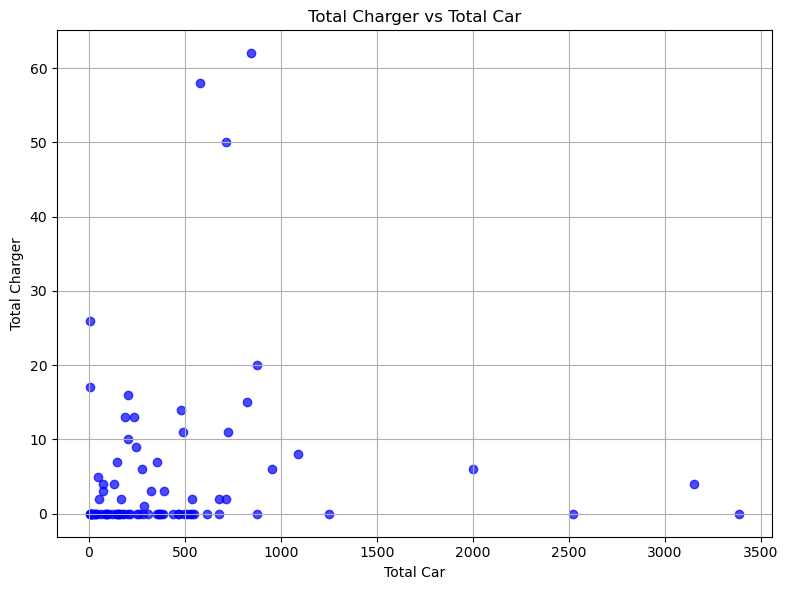

In [88]:
import matplotlib.pyplot as plt

# Define your data
mean_car = df2.mean_car.to_list()
total_charger = df2.total_charger.to_list()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_car, total_charger, color='blue', marker='o', alpha=0.7)

# Add labels and title
plt.title('Total Charger vs Total Car')
plt.xlabel('Total Car')
plt.ylabel('Total Charger')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the data
mean_car = df2.mean_car.to_list()
total_charger = df2.total_charger.to_list()
# Convert lists to numpy arrays
X = np.array(mean_car).reshape(-1, 1)  # Feature matrix
y = np.array(total_charger)             # Target vector

# Define polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.00000000e+00  1.51238966e-02 -4.82186232e-06]
Intercept: 1.1174251207422854
